**To predict salary of employee of similar profiles.**


This is a capstone project given by launched.
The objective of this exercise is to build a model, using historical data, that will determine
the salary to be offered to an employee, minimizing manual judgment in the selection process. The
approach aims to be robust and eliminate any discrimination in salary among employees with similar
profiles.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
file=files.upload()
df=pd.read_csv('expected_ctc.csv')
df.head()

Saving expected_ctc.csv to expected_ctc (2).csv


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [51]:
df.columns

Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry',
       'Organization', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

The dataset is provided by launched.There are 27 feature column and 1 target variable

*Feature columns are: *

 1   Total_Experience                     
 2   Total_Experience_in_field_applied    
 3   Department                         
 4  Role                                
 5   Industry                            
 6   Organization                        
 6   Designation                         
 7   Education                           
 8  Graduation_Specialization           
 9  University_Grad                    
 10  Passing_Year_Of_Graduation         
 11  PG_Specialization                   
 12  University_PG                       
 13  Passing_Year_Of_PG                 
 14  PHD_Specialization                  
 15  University_PHD                      
 16  Passing_Year_Of_PHD                
 17  Curent_Location                     
 18  Preferred_location                  
 19  Current_CTC                          
 20  Inhand_Offer                        
 21  Last_Appraisal_Rating               
 22  No_Of_Companies_worked               
 23  Number_of_Publications               
 24  Certifications                       
 25  International_degree_any

*Target variable is:*

 1  Expected_CTC

1st Step. To perform EDA

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [54]:
df.describe()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12500.500000,34993.240080,12.493080,6.258200,2002.193624,2005.153571,2007.396372,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7217.022701,14390.271591,7.471398,5.819513,8.316640,9.022963,7.493601,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,1.000000,10000.000000,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6250.750000,22563.750000,6.000000,1.000000,1996.000000,1997.000000,2001.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12500.500000,34974.500000,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,18750.250000,47419.000000,19.000000,10.000000,2009.000000,2012.000000,2014.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25000.000000,60000.000000,25.000000,25.000000,2020.000000,2023.000000,2020.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


In [55]:
df.isnull().sum()

,0
IDX,0
Applicant_ID,0
Total_Experience,0
Total_Experience_in_field_applied,0
Department,2778
Role,963
Industry,908
Organization,908
Designation,3129
Education,0


The data is currently seems to uncleaned,lets perform data cleaning.

1. Handling outliers
2. I will be using catboost so the algorithm so there wont be need for handling missing values

In [56]:
df = df.drop('IDX', axis=1)
df = df.drop('Applicant_ID', axis=1)
display(df.head())

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


No need for IDX column & Applicant_ID

In [57]:
df['Department'].fillna(np.nan, inplace=True)
display(df.head())

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [58]:
df['Designation'].fillna('fresher', inplace=True)
display(df.head())

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,fresher,PG,Arts,Lucknow,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,fresher,Doctorate,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


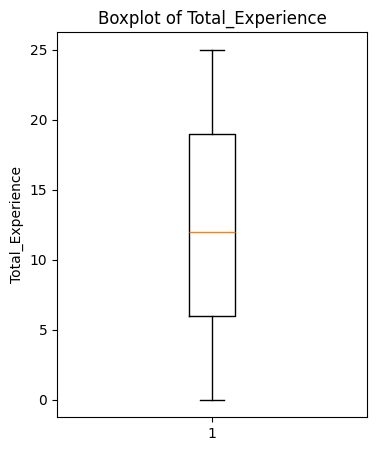

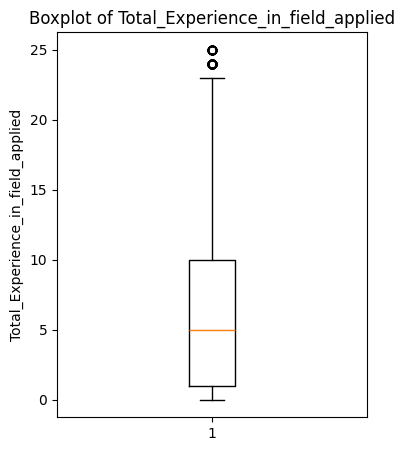

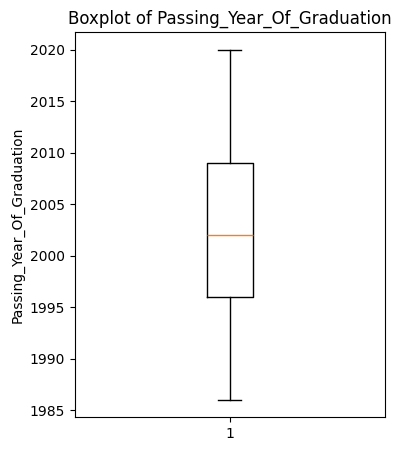

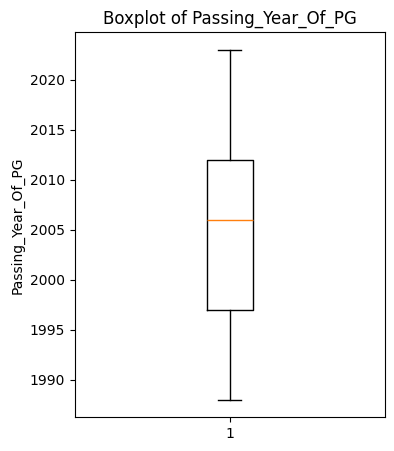

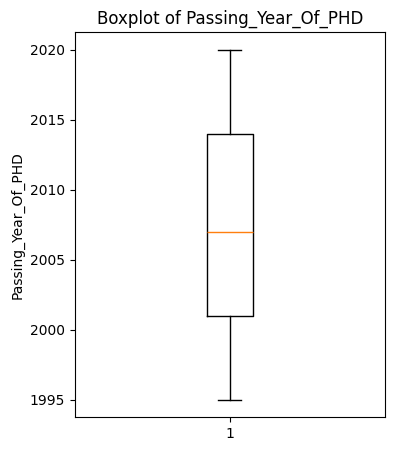

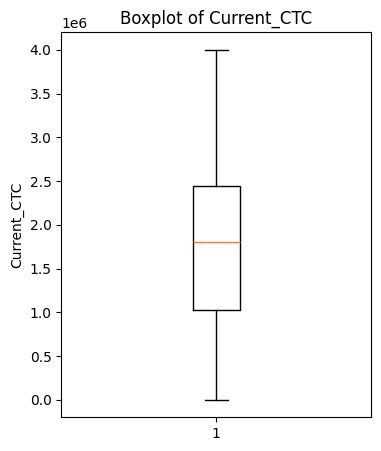

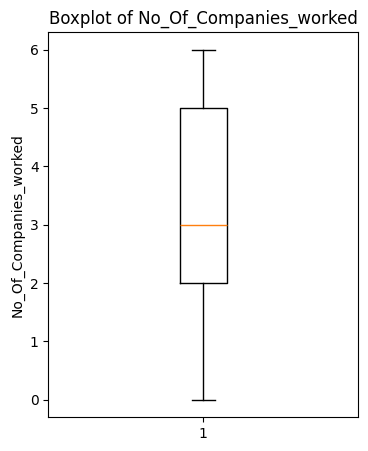

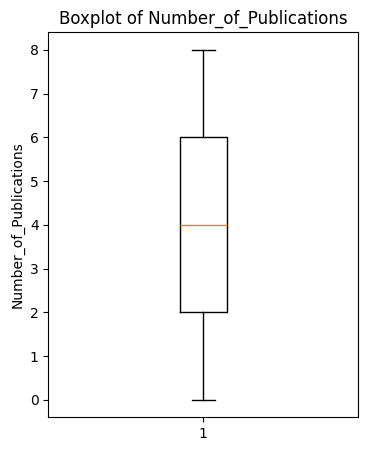

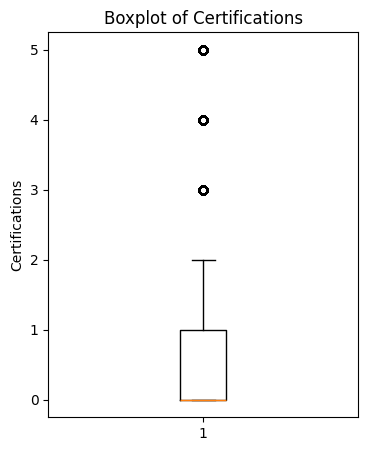

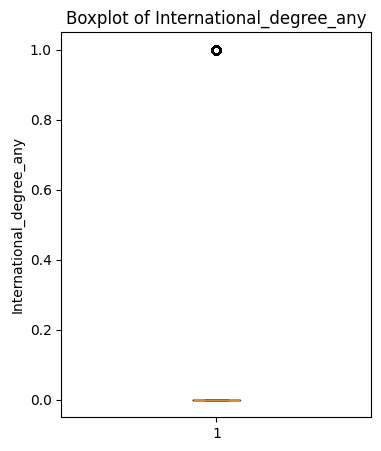

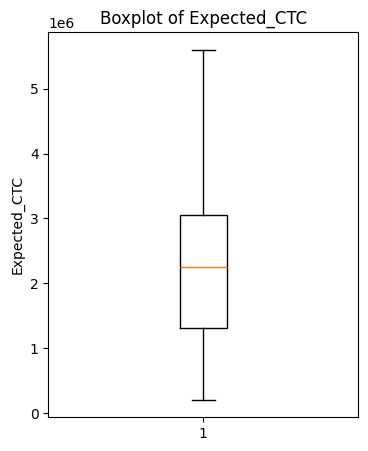

In [59]:
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=['int64','float64'])

# Create one figure per numeric column
for col in num_df.columns:
    plt.figure(figsize=(4,5))
    plt.boxplot(num_df[col].dropna())  # drop NaN to avoid errors
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


In [60]:
cols_year = ["Passing_Year_Of_Graduation", "Passing_Year_Of_PG", "Passing_Year_Of_PHD"]

for c in cols_year:
    df.loc[df[c] <= 1900, c] = np.nan

In [61]:
!pip install catboost
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor, Pool
import joblib
import time
import warnings
warnings.filterwarnings("ignore")

In [62]:
# CONFIG
TARGET = 'Expected_CTC'     # confirmed target
RANDOM_STATE = 42
K = 3                      # CV folds
N_ITER = 5                 # number of iterations for RandomizedSearchCV (adjust for speed)
N_JOBS = -1                 # parallel jobs for RandomizedSearchCV (-1 uses all cores)
VERBOSE = 1                 # verbosity for RandomizedSearchCV

# Manual list of categorical columns (please adjust if names differ)
categorical_cols = [
    'Department', 'Role', 'Industry', 'Organization', 'Designation', 'Education',
    'Graduation_Specialization', 'University_Grad', 'PG_Specialization', 'University_PG',
    'PHD_Specialization', 'University_PHD', 'Curent_Location', 'Preferred_location',
    'Inhand_Offer', 'Last_Appraisal_Rating', 'International_degree_any'
]


In [63]:
# Ensure categorical columns exist in df and filter list
categorical_cols = [c for c in categorical_cols if c in df.columns]
print("Using categorical columns:", categorical_cols)

Using categorical columns: ['Department', 'Role', 'Industry', 'Organization', 'Designation', 'Education', 'Graduation_Specialization', 'University_Grad', 'PG_Specialization', 'University_PG', 'PHD_Specialization', 'University_PHD', 'Curent_Location', 'Preferred_location', 'Inhand_Offer', 'Last_Appraisal_Rating', 'International_degree_any']


In [64]:
# ====== PREPARE X and y ======
X = df.drop(columns=[TARGET])
y = df[TARGET].values

In [65]:
# Convert dtype for columns in categorical list to 'object' if not already
for c in categorical_cols:
    X[c] = X[c].astype('object')

In [66]:
cat_features = categorical_cols

In [75]:
# ====== TRAIN/VALID/TEST SPLIT ======
# Split data into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=RANDOM_STATE)

# Split training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, random_state=RANDOM_STATE) # adjust validation size based on the first split

print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (17499, 26), Val shape: (3751, 26), Test shape: (3750, 26)


In [69]:
# ========== BASELINE (quick sanity) ==========
import math

base = CatBoostRegressor(
    loss_function='RMSE',
    iterations=2000,
    learning_rate=0.1,
    depth=6,
    task_type='GPU',
    devices='0',          # typical single GPU device id in Colab
    random_seed=RANDOM_STATE,
    verbose=0
)

print("Training baseline CatBoost (GPU) ...")
t0 = time.time()

# Convert NaN values in categorical columns to strings
for col in cat_features:
    X_train[col] = X_train[col].fillna('NaN').astype(str)
    X_val[col] = X_val[col].fillna('NaN').astype(str)

base.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=False)
t1 = time.time()
print(f"Baseline trained in {t1-t0:.1f} s")

y_val_pred = base.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = math.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print("Baseline metrics (val):")
print(f"  MSE : {mse_val:.4f}")
print(f"  RMSE: {rmse_val:.4f}")
print(f"  MAE : {mae_val:.4f}")
print(f"  R2  : {r2_val:.6f}")

Training baseline CatBoost (GPU) ...
Baseline trained in 61.7 s
Baseline metrics (val):
  MSE : 594589100.9721
  RMSE: 24384.1978
  MAE : 16516.8503
  R2  : 0.999554


In [70]:
# ========== RANDOMIZED HYPERPARAMETER SEARCH ==========
est = CatBoostRegressor(
    task_type='GPU',
    devices='0',
    loss_function='RMSE',   # CatBoost objective (we optimize sklearn MSE)
    random_seed=RANDOM_STATE,
    verbose=0
)

param_dist = {
    'iterations': [500, 800, 1200],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.0, 0.2, 0.5, 1.0],
    'random_strength': [0, 1, 2, 5],
}

cv = KFold(n_splits=K, shuffle=True, random_state=RANDOM_STATE)

rs = RandomizedSearchCV(
    estimator=est,
    param_distributions=param_dist,
    n_iter=N_ITER,
    scoring='neg_mean_squared_error',  # optimizing MSE
    cv=cv,
    random_state=RANDOM_STATE,
    verbose=VERBOSE,
    n_jobs=N_JOBS,
    refit=True
)

In [71]:
# fit_params to tell CatBoost which cols are categorical
fit_params = {'cat_features': cat_features}

print("Starting RandomizedSearchCV (GPU). This will run n_iter * CV folds model trainings ...")
t0 = time.time()

# Convert NaN values in categorical columns to strings for the full dataset X
for col in cat_features:
    X[col] = X[col].fillna('NaN').astype(str)

rs.fit(X, y, **fit_params)
t1 = time.time()
print(f"RandomizedSearchCV finished in {(t1-t0)/60:.2f} minutes.")
print("Best params found:")
print(rs.best_params_)
print("Best CV score (neg MSE):", rs.best_score_)
print()

best_model = rs.best_estimator_

Starting RandomizedSearchCV (GPU). This will run n_iter * CV folds model trainings ...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
RandomizedSearchCV finished in 13.98 minutes.
Best params found:
{'random_strength': 0, 'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 800, 'depth': 10, 'bagging_temperature': 0.0}
Best CV score (neg MSE): -636505597.7770934



In [76]:
# predict using the best model from RandomizedSearchCV
y_pred = best_model.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("Final Evaluation on Test Set:")
print(f"  MSE : {mse}")
print(f"  RMSE: {rmse}")
print(f"  MAE : {mae}")
print(f"  R2  : {r2}")

Final Evaluation on Test Set:
  MSE : 496601081.11549956
  RMSE: 22284.548034804287
  MAE : 14184.798150704955
  R2  : 0.9996277739649541


In [77]:
# ========== SAVE BEST MODEL ==========
model_filename = "catboost_best_model_gpu.joblib"
joblib.dump(best_model, model_filename)
print("Saved best model to:", model_filename)


Saved best model to: catboost_best_model_gpu.joblib


In [78]:
# Save the cleaned DataFrame to a CSV file
cleaned_data_filename = "cleaned_expected_ctc.csv"
df.to_csv(cleaned_data_filename, index=False)
print(f"Cleaned data saved to {cleaned_data_filename}")

Cleaned data saved to cleaned_expected_ctc.csv


In [80]:
import joblib
import pandas as pd

# 1) Load model
model = joblib.load("catboost_best_model_gpu.joblib")

# 2) Prepare a single sample (must match training columns!)
sample = pd.DataFrame([{
    "Total_Experience": 5,
    "Total_Experience_in_field_applied": 3,
    "Department": "HR",
    "Role": "Analyst",
    "Industry": "Telecom",
    "Organization": "ABC",
    "Designation": "Manager",
    "Education": "PG",
    "Graduation_Specialization": "Commerce",
    "University_Grad": "Delhi",
    "Passing_Year_Of_Graduation": 2015,
    "PG_Specialization": "Management",
    "University_PG": "Mumbai",
    "Passing_Year_Of_PG": 2018,
    "PHD_Specialization": "NaN",
    "University_PHD": "NaN",
    "Passing_Year_Of_PHD": 0,
    "Curent_Location": "Pune",
    "Preferred_location": "Mumbai",
    "Current_CTC": 800000,
    "Inhand_Offer": "N",
    "Last_Appraisal_Rating": "B",
    "No_Of_Companies_worked": 2,
    "Number_of_Publications": 0,
    "Certifications": 1,
    "International_degree_any": 0
}])

# 3) Predict
pred = model.predict(sample)
print("Predicted Expected CTC:", pred[0])


Predicted Expected CTC: 1038509.2473714286


Here is a **clean structured summary** of what we did in this ML workflow:

---

## ✅ 1) Data Understanding & Cleaning (conceptually)

* Inspected dataset: job applicants and target = `Expected_CTC`
* Identified education-related fields that can be set to `None` depending on highest degree
* Decided **not to fully clean manually yet**, but proceeded with ML workflow

---

## ✅ 2) Prepared Data for CatBoost

* Identified **categorical vs numerical columns**
* Filled NaN in categorical columns with `'NaN'` (string)
* Converted categorical columns to `str` type (required for CatBoost)

---

## ✅ 3) Baseline Model (CatBoost)

* Trained a **fast baseline CatBoostRegressor**
* Evaluated using validation set
* Got metrics: MSE, RMSE, MAE, R²

---

## ✅ 4) Hyperparameter Tuning (RandomizedSearchCV + GPU)

* Used **RandomizedSearchCV** with CatBoost & GPU enabled
* Defined parameter search space (`depth`, `learning_rate`, `l2_leaf_reg`, etc.)
* Used `n_iter`, `KFold`, and `scoring='neg_mean_squared_error'`
* Ran search → took long time (because GPU + CV + tuning)
* Collected:

  * Best parameters
  * Best cross-validation RMSE

---

## ✅ 5) Final Evaluation

* Trained best model on full train set (after tuning)
* Evaluated again on validation/test data
* Printed final metrics: MSE, RMSE, MAE, R²

---

## ✅ 6) Saved Model

* Saved trained tuned model using **joblib**

  ```python
  joblib.dump(best_model, "catboost_model.joblib")
  ```

---

## ✅ 7) Loaded & Used Model for Prediction

* Loaded it back using `joblib.load()`
* Created a sample applicant row
* Predicted `Expected_CTC` for new input

---

### ▶ In One Sentence:

I built an **end-to-end regression pipeline** using CatBoost with GPU, optimized it with RandomizedSearchCV + KFold, evaluated it, saved it, and learned how to use the saved model for future predictions.

